In [251]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [262]:
# loading data in, dataset utilizes ';' as separator
data = pd.read_csv("student-mat.csv", sep=";")

In [263]:
print(data.head())
print(data.dtypes)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
school        object
sex           object
age            int64
address       object
fams

In [264]:
# Binarize categorical variables
data['sex'] = data['sex'].replace(['F','M'],[0,1])
data['address'] = data['address'].replace(['U','R'],[0,1])
data['schoolsup'] = data['schoolsup'].replace(['yes','no'],[0,1])
data['famsup'] = data['famsup'].replace(['yes','no'],[0,1])
data['paid'] = data['paid'].replace(['yes','no'],[0,1])
data['activities'] = data['activities'].replace(['yes','no'],[0,1])
data['nursery'] = data['nursery'].replace(['yes','no'],[0,1])
data['higher'] = data['higher'].replace(['yes','no'],[0,1])
data['internet'] = data['internet'].replace(['yes','no'],[0,1])
data['romantic'] = data['romantic'].replace(['yes','no'],[0,1])

print(data)
print(data.dtypes)

    school  sex  age  address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP    0   18        0     GT3       A     4     4   at_home   teacher   
1       GP    0   17        0     GT3       T     1     1   at_home     other   
2       GP    0   15        0     LE3       T     1     1   at_home     other   
3       GP    0   15        0     GT3       T     4     2    health  services   
4       GP    0   16        0     GT3       T     3     3     other     other   
..     ...  ...  ...      ...     ...     ...   ...   ...       ...       ...   
390     MS    1   20        0     LE3       A     2     2  services  services   
391     MS    1   17        0     LE3       T     3     1  services  services   
392     MS    1   21        1     GT3       T     1     1     other     other   
393     MS    1   18        1     LE3       T     3     2  services     other   
394     MS    1   19        0     LE3       T     1     1     other   at_home   

     ... famrel freetime  g

In [265]:
data = data.select_dtypes(exclude=['object'])
x_columns = list(data.columns)
x_columns.remove('G3')
print(x_columns)

['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


### Feature Selection

an experimental attempt of backwards stepwise regression. Starting with a full model, predictors will be removed until all p-values have a values less than 0.05.

In [266]:
y = data["G3"]

In [267]:
def get_stats():
    x = data[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())


In [268]:
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              564.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                   2.49e-277
Time:                        00:45:54   Log-Likelihood:                         -796.81
No. Observations:                 395   AIC:                                      1644.
Df Residuals:                     370   BIC:                                      1743.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [269]:
x_columns.remove("goout")
x_columns.remove("address")
x_columns.remove("higher")
x_columns.remove("sex")
x_columns.remove("paid")
x_columns.remove("freetime")
x_columns.remove("traveltime")
x_columns.remove("health")
x_columns.remove("nursery")
x_columns.remove("famsup")
x_columns.remove("Dalc")
x_columns.remove("internet")
x_columns.remove("Medu")
x_columns.remove("Fedu")
x_columns.remove("schoolsup")
x_columns.remove("studytime")
x_columns.remove("failures")
x_columns.remove("romantic")
x_columns.remove("Walc")
x_columns.remove("activities")


In [270]:
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2819.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                   1.46e-303
Time:                        00:45:58   Log-Likelihood:                         -806.99
No. Observations:                 395   AIC:                                      1624.
Df Residuals:                     390   BIC:                                      1644.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [271]:
model1 = x_columns
print(model1)
#model2 = ["G1", "G2", "studytime", "failures", "absences"]

['age', 'famrel', 'absences', 'G1', 'G2']


In [242]:
predict = "G3" 
X = np.array(data[model2]) # attribute
Y = np.array(data[predict]) # what to predict

# splitting data
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(X, Y, test_size = 0.2)


In [243]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)


print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)


0.8296768280337062
Coefficient: 
 [ 0.1187218   0.99343899 -0.14054633 -0.35460452  0.03239339]
Intercept: 
 -1.3171499161970406


In [36]:
data.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

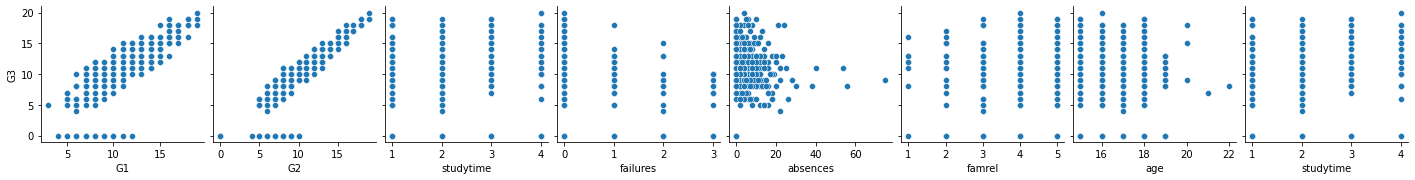

In [245]:
sns.pairplot(data,x_vars=['G1','G2', "studytime", "failures", "absences", 'famrel', "age", "studytime"],y_vars=['G3'])

In [18]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

10.51192599849971 [11 11  4  0  8] 10
16.34565014778346 [16 16  2  0  2] 16
7.023284094181465 [ 9  7  2  0 18] 6
12.155871880032151 [12 12  2  0 12] 11
16.440656446130706 [17 16  2  0  0] 16
9.254398141907274 [10 10  2  1  0] 0
14.056054409743348 [15 14  3  0  2] 15
6.09959534612384 [7 7 3 0 6] 7
9.286175572159166 [ 9  9  1  0 22] 9
14.311616293112634 [15 14  2  0  4] 14
12.881722109595762 [12 13  1  1  6] 14
14.981217658072673 [14 15  2  0  0] 15
11.903062748272905 [14 12  4  0  6] 13
14.841860829892962 [12 15  1  0  0] 15
10.74984161209894 [11 11  2  0  4] 11
9.358704862325743 [ 8 10  2  0  6] 10
6.204888748029843 [ 6  7  2  1 15] 8
11.280086148879267 [ 8 12  1  0  0] 12
16.34565014778346 [16 16  2  0  2] 17
10.167663055465493 [ 9 11  3  0  2] 11
8.320889045879117 [8 9 2 0 4] 10
12.781122715159725 [10 13  1  0  6] 13
12.878881765117011 [13 13  2  0  0] 12
10.681539573814106 [11 11  2  0  2] 11
8.852411833997785 [10  9  2  0 10] 10
12.859760995075257 [16 12  1  0  8] 13
15.04951969635